In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gdp_df = pd.read_csv('gdp_analysis.csv')
X = gdp_df.loc[:,['slope', 'y_intercept', 'volatility', 'min_year', 'max_year']]
#X = gdp_df.loc[:,['slope', 'y_intercept', 'volatility']]
y = gdp_df.loc[:, 'got_loan']
#y = gdp_df.loc[:, 'got_mentioned']

In [3]:
gdp_df.head()

,country_name,slope,y_intercept,volatility,min_year,max_year,got_loan,got_mentioned
0,afghanistan,7.675012,-1.497918e+04,0.540344,1960.0,2020.0,0.0,0.0
1,albania,155.758189,-3.094915e+05,0.370373,1984.0,2020.0,1.0,1.0
2,algeria,76.377837,-1.498252e+05,0.568859,1960.0,2020.0,1.0,1.0
3,american samoa,228.691323,-4.494300e+05,0.597126,2002.0,2019.0,0.0,0.0
4,andorra,918.360834,-1.809247e+06,0.385188,1970.0,2019.0,0.0,0.0


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.2, shuffle = True)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
import xgboost

In [6]:
rf = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'entropy')
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5)

In [7]:
print(accuracy_score(y, rf.predict(X)))
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_test, rf.predict(X_test)))
#print(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

0.8245614035087719
0.8455882352941176
0.7428571428571429


In [8]:
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), learning_rate = 0.3,
                        n_estimators = 3)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.3, n_estimators=3)

In [9]:
print(accuracy_score(y, ada.predict(X)))
print(accuracy_score(y_train, ada.predict(X_train)))
print(accuracy_score(y_test, ada.predict(X_test)))
#print(roc_auc_score(y_test, ada.predict_proba(X_test)[:,1]))

0.7543859649122807
0.7647058823529411
0.7142857142857143


In [10]:
np.mean(y)

0.5672514619883041

In [11]:
ex = ExtraTreesClassifier(n_estimators = 60, max_depth = 2)
ex.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=2, n_estimators=60)

In [12]:
print(accuracy_score(y, ex.predict(X)))
print(accuracy_score(y_train, ex.predict(X_train)))
print(accuracy_score(y_test, ex.predict(X_test)))

0.695906432748538
0.6985294117647058
0.6857142857142857


In [13]:
from sklearn.model_selection import StratifiedKFold

In [14]:
kf = StratifiedKFold(n_splits = 20)
cv = np.zeros((20,3))
i = 0
for train_index, test_index in kf.split(X,y):
    X_train= X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_val = X.iloc[test_index]
    y_val = y.iloc[test_index]
    
    rf = RandomForestClassifier(n_estimators = 60, max_depth = 4, criterion = 'gini', bootstrap = False)
    rf.fit(X_train,y_train)
    
    ex = ExtraTreesClassifier(n_estimators = 100, max_depth = 6)
    ex.fit(X_train,y_train)
    
        #ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 2), learning_rate = 0.3,
                        #n_estimators = 10)
        #ada.fit(X_train, y_train)
    
    cv[i,0] = accuracy_score(y_val, rf.predict(X_val))
    cv[i,1] = roc_auc_score(y_val, rf.predict_proba(X_val)[:,1])
    cv[i,2] = accuracy_score(y_val, ex.predict(X_val))
    i = i+1
    

In [15]:
np.mean(cv, axis = 0)

array([0.68402778, 0.77020833, 0.68888889])

accuracy = 85.71
roc auc = 0.9667


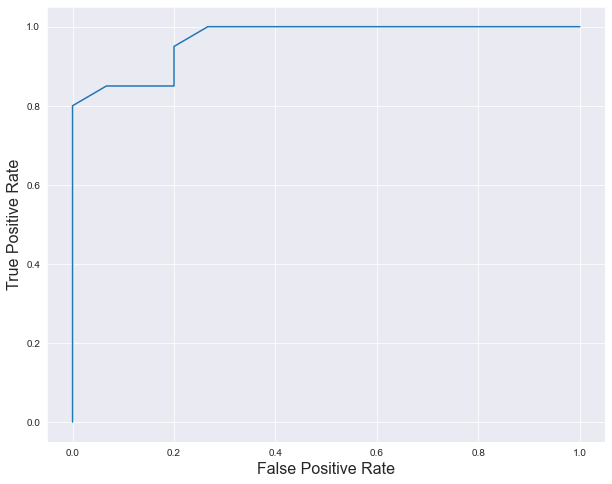

In [24]:
print("accuracy =", 100*np.round(accuracy_score(y_test, rf.predict(X_test)), 4))
print("roc auc =", np.round(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]), 4))


fprs,tprs,thresh = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure(figsize=(10,8))

plt.plot(fprs, tprs, '-')

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)


plt.show()

In [23]:
import seaborn as sns

sns.set_style("darkgrid")

/Users/attiliocastano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/attiliocastano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/attiliocastano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/attiliocastano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/attiliocastano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:1182: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/Users/attiliocastano/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions

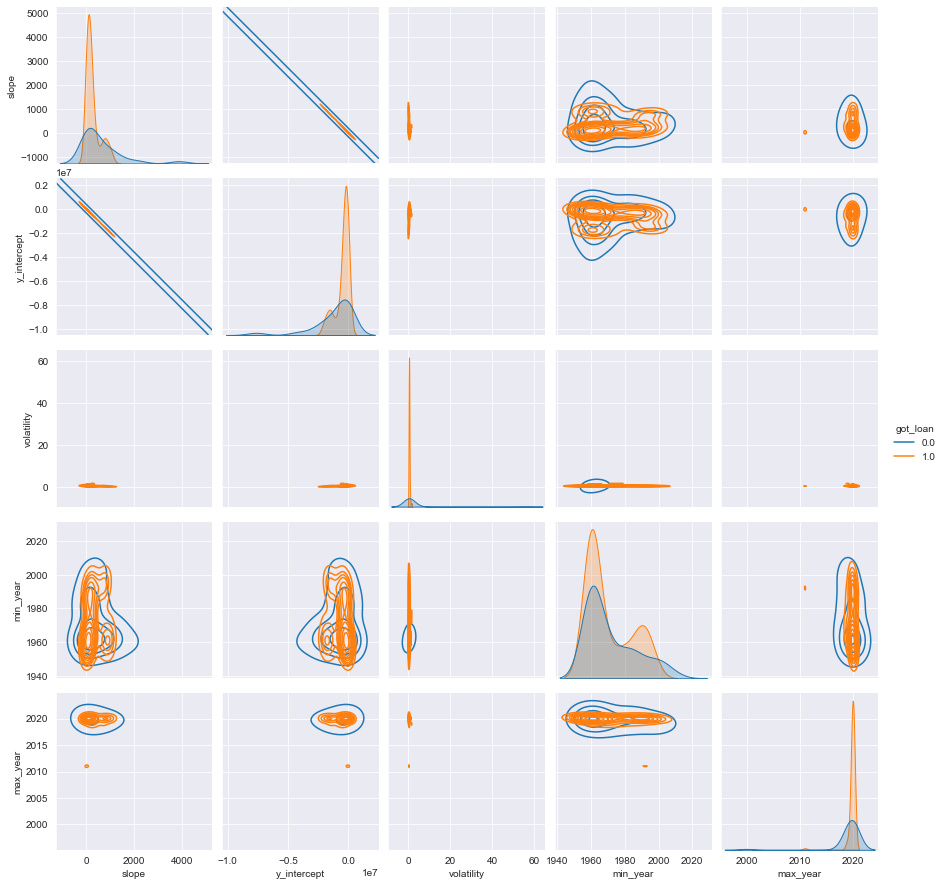

In [18]:
sns.pairplot(gdp_df, vars = ['slope', 'y_intercept', 'volatility', 'min_year', 'max_year'], hue = 'got_loan',
            kind = 'kde')

(-2.0, 2.0)

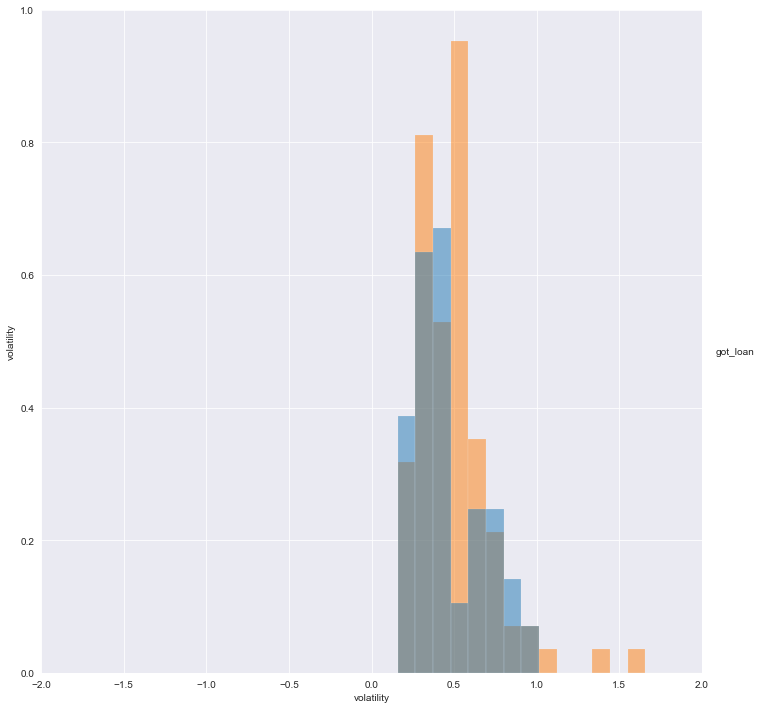

In [19]:
sns.pairplot(gdp_df, vars = ['volatility'], hue = 'got_loan', height = 10, kind = 'hist')
plt.xlim(-2,2)

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [21]:
accuracy_score(y_test, log.predict(X_test))

0.7142857142857143

In [22]:
roc_auc_score(y_test, log.predict_proba(X_test)[:,1])

0.6533333333333333